In [1]:
import numpy as np

In [2]:
def get_digit_inputs():
    """Each digit is represented by a 6x6 grid of 1's and 0's separated by blank lines."""
    fp = open("digits.data", "r")
    data = []
    while True:
        digit = []
        line = fp.readline()
        while len(line) != 0 and (line[0] == '0' or line[0] == '1'):
            line.strip()
            values = line.split()
            digit += [int(v) for v in values]
            line = fp.readline()
        if len(line) == 0:
            break
        if len(digit) > 0:
            data.append(digit)
    return np.array(data)

In [3]:
inputs = get_digit_inputs()
inputs.shape

(240, 36)

In [4]:
def one_hot(length, index):
    vec = [0]*length
    vec[index] = 1
    return vec

In [5]:
def get_digit_targets(n):
    """Create n repetitions of 10 one-hot vectors"""
    data = []
    for i in range(n):
        for j in range(10):
            data.append(one_hot(10, j))
    return np.array(data)

In [6]:
targets = get_digit_targets(24)
targets.shape

(240, 10)

In [7]:
from aitk.networks import SimpleNetwork

In [8]:
def build_model():
    net = SimpleNetwork(36, (8, "sigmoid"), (10, "softmax"),
        loss = "categorical_crossentropy",
        metrics = ["tolerance_accuracy"]
        )
    net.set_config_layer("input", vshape=(6,6,1), colormap=("gray",0,1))
    net.set_learning_rate(0.1)
    net.set_momentum(0.0)
    return net                  

In [9]:
net = build_model()
net.set_tolerance(0.2)

In [10]:
history = net.fit(
    inputs, targets, 
    batch_size=16, 
    shuffle=True,
    epochs=600, 
    accuracy=1.0, 
    patience=30, 
    report_rate=10,
)

Epoch 600/600 loss: 0.05745095759630203 - tolerance_accuracy: 0.9583333134651184



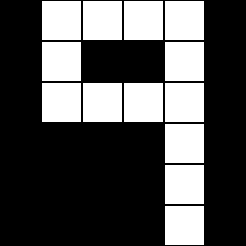

press enter 


In [12]:
for pattern in inputs[0:20]:
    net.display(pattern)
    x = input("press enter")

In [14]:
# Give each digit it's own color
colors = ["pink", "red", "orange", "yellow", "green", 
          "teal", "blue", "indigo", "violet", "black"]


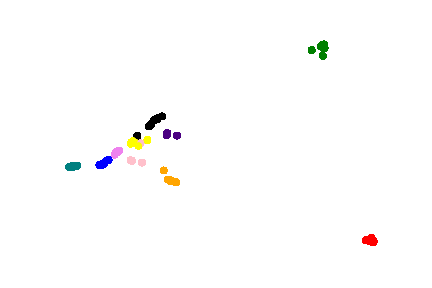
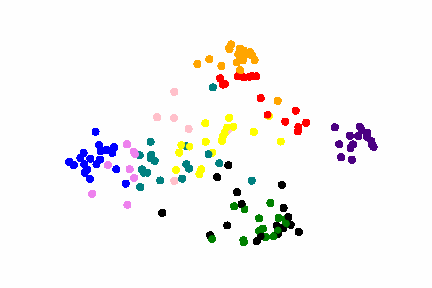
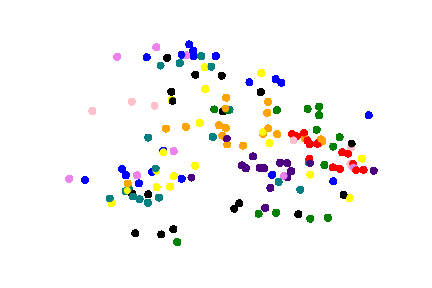

In [15]:
net.predict_pca(inputs, colors=colors*24)

In [16]:
from scipy.cluster import hierarchy

In [17]:
labelList = [str(v) for v in range(10)]

In [19]:
hidden_raw = net.predict_to(inputs, "hidden")

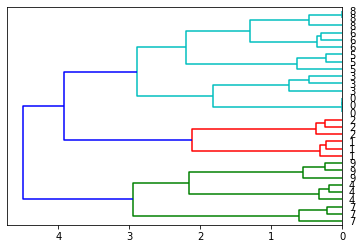

In [22]:
result = hierarchy.dendrogram(
    hierarchy.linkage(hidden_raw[30:60],method='ward'),
    orientation="left", 
    labels=labelList*3,
)